In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import seaborn as sns
from imblearn.over_sampling import SMOTENC

In [3]:
adult = pd.read_csv("../data sets/adult.csv")

In [4]:
adult

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  \
0              2174             0              40  United-States   
1                 0             0              13  United-States   
2                 0             0              40  United-States   
3                 0             0              40  United-States   
4                 0             0              40           Cuba   
...             ...           ...             ...            ...   
32556             0             0              38  United-States   
32557             0             0              40  United-States   
32558             0             0              40  United-States   
32559             0             0              20  United-States   
32560         15024             0              40  United-States   

      income-per-year  
0               <=50K  
1               <=50K  
2               <=50K  
3               <=50K  
4               <=50K  
...               ...  
32556           <=50K  
32557            >50K  
32558           <=50K  
32559           <=50K  
32560            >50K  

[32561 rows x 15 columns]

In [7]:
y = adult['race']

sm = SMOTENC(random_state=0, categorical_features=[1,3,5,6,7,8,9,13,14])
adult, y = sm.fit_resample(adult, y)

#### We begin with an analysis of the gender distribution

In [8]:
females_num = np.sum(adult['sex'] == 'Female') # Fancy way of counting true values in an array
print('Number of females: ' + str(females_num)) 
highly_paid_fem = np.sum((adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid females: ' + str(highly_paid_fem))
highly_paid_fem_per = highly_paid_fem / females_num
print('Percentage of highly paid females: ' + str(highly_paid_fem_per) + '%')

males_num = np.sum(adult['sex'] == 'Male')
print('Number of males: ' + str(males_num)) 
highly_paid_male = np.sum((adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid males: ' + str(highly_paid_male))
highly_paid_male_per = highly_paid_male / males_num
print('Percentage of highly paid males: ' + str(highly_paid_male_per) + '%')

Number of females: 48942
Number of highly paid females: 1552
Percentage of highly paid females: 0.03171100486289894%
Number of males: 90138
Number of highly paid males: 10292
Percentage of highly paid males: 0.1141804788213628%


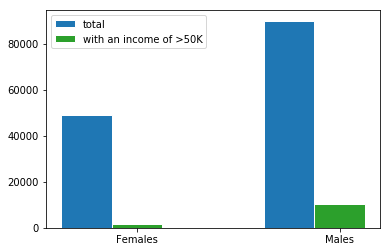

In [9]:
barWidth = .25

bars1 = [females_num, males_num]
bars2 = [highly_paid_fem, highly_paid_male]
x_labels = ('Females', 'Males')
y_pos1 = np.arange(len(bars1))
y_pos2 = [x + barWidth for x in y_pos1]

plt.bar(y_pos1, bars1, color='tab:blue',  width=barWidth, edgecolor='white', label='total')
plt.bar(y_pos2, bars2, color='tab:green',  width=barWidth, edgecolor='white', label='with an income of >50K')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)

plt.show()

This data set contains about twice as many males as females. And about six times as many highly paid males as highly paid females. So high earning females are a minority in this data set.

#### Check the categories in the sensetiv attribute race

In [10]:
pd.unique(adult['race']) 

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

#### And analyze the distributions

In [11]:
white_num = np.sum(adult['race'] == 'White') # Fancy way of counting true values in an array
print('Number of white people: ' + str(white_num)) 
highly_paid_whites = np.sum((adult['race'] == 'White') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid white people: ' + str(highly_paid_whites))
highly_paid_whites_per = highly_paid_whites / white_num
print('Percentage of highly paid white people: ' + str(highly_paid_whites_per) + '%')
print('')
black_num = np.sum(adult['race'] == 'Black') # Fancy way of counting true values in an array
print('Number of black people: ' + str(black_num)) 
highly_paid_black = np.sum((adult['race'] == 'Black') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid black people: ' + str(highly_paid_black))
highly_paid_black_per = highly_paid_black / black_num
print('Percentage of highly paid black people: ' + str(highly_paid_black_per) + '%')
print('')
asian_num = np.sum(adult['race'] == 'Asian-Pac-Islander') # Fancy way of counting true values in an array
print('Number of asian people: ' + str(asian_num)) 
highly_paid_asian = np.sum((adult['race'] == 'Asian-Pac-Islander') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid asian people: ' + str(highly_paid_asian))
highly_paid_asian_per = highly_paid_asian / asian_num
print('Percentage of highly paid asian people: ' + str(highly_paid_asian_per) + '%')
print('')
indian_num = np.sum(adult['race'] == 'Amer-Indian-Eskimo') # Fancy way of counting true values in an array
print('Number of indian people: ' + str(indian_num)) 
highly_paid_indian = np.sum((adult['race'] == 'Amer-Indian-Eskimo') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid indian people: ' + str(highly_paid_indian))
highly_paid_indian_per = highly_paid_asian / indian_num
print('Percentage of highly paid indian people: ' + str(highly_paid_indian_per) + '%')
print('')
other_num = np.sum(adult['race'] == 'Other') # Fancy way of counting true values in an array
print('Number of others: ' + str(other_num)) 
highly_paid_other = np.sum((adult['race'] == 'Other') & (adult['income-per-year'] == '>50K'))
print('Number of highly paid others: ' + str(highly_paid_other))
highly_paid_other_per = highly_paid_asian / other_num
print('Percentage of highly paid others: ' + str(highly_paid_other_per))

Number of white people: 27816
Number of highly paid white people: 7117
Percentage of highly paid white people: 0.2558599367270636%

Number of black people: 27816
Number of highly paid black people: 1059
Percentage of highly paid black people: 0.03807161345987921%

Number of asian people: 27816
Number of highly paid asian people: 3313
Percentage of highly paid asian people: 0.11910411274086856%

Number of indian people: 27816
Number of highly paid indian people: 143
Percentage of highly paid indian people: 0.11910411274086856%

Number of others: 27816
Number of highly paid others: 212
Percentage of highly paid others: 0.11910411274086856


#### Lets plot this informations

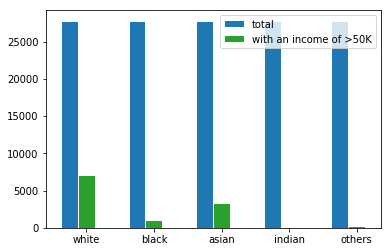

In [12]:
barWidth = 0.25
bars1 = [white_num, black_num, asian_num, indian_num, other_num]
bars2 = [highly_paid_whites, highly_paid_black, highly_paid_asian, highly_paid_indian, highly_paid_other]
x_labels = ['white', 'black', 'asian', 'indian', 'others']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='with an income of >50K')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


#### Ok, looks like white people strongly dominate the data set :/

#### Lets compare white people against the sum of all the others

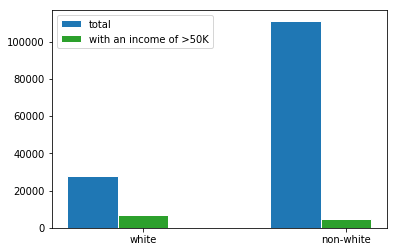

In [13]:
barWidth = 0.25
bars1 = [white_num, black_num + asian_num + indian_num + other_num]
bars2 = [highly_paid_whites, highly_paid_black + highly_paid_asian + highly_paid_indian + highly_paid_other]
x_labels = ['white', 'non-white']
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='with an income of >50K')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()

#### The paper uses combined attributes like race-sex (e.g. white-female), so we would like to get an ordered list with numbers of the combined attributes

In [14]:
import itertools

races = pd.unique(adult['race']) 
genders = ['Male', 'Female']
combined = list(itertools.product(races, genders))
combined_list = []
for c in combined:
    print(str(c) + ': ' + str(np.sum((adult['race'] == c[0]) & (adult['sex'] == c[1]))))
    combined_list.append([c, np.sum((adult['race'] == c[0]) & (adult['sex'] == c[1]))])

('White', 'Male'): 19174
('White', 'Female'): 8642
('Black', 'Male'): 14038
('Black', 'Female'): 13778
('Asian-Pac-Islander', 'Male'): 20266
('Asian-Pac-Islander', 'Female'): 7550
('Amer-Indian-Eskimo', 'Male'): 18607
('Amer-Indian-Eskimo', 'Female'): 9209
('Other', 'Male'): 18053
('Other', 'Female'): 9763


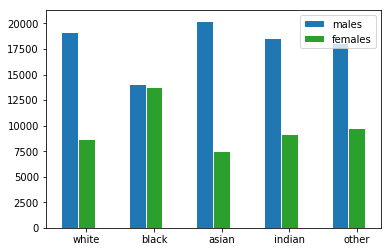

In [15]:
barWidth = 0.25

bars1 = [combined_list[0][1], combined_list[2][1], combined_list[4][1], combined_list[6][1], combined_list[8][1]]
bars2 = [combined_list[1][1], combined_list[3][1], combined_list[5][1], combined_list[7][1], combined_list[9][1]]

x_labels = ['white', 'black', 'asian', 'indian', 'other']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='females')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()


#### income for white males and females

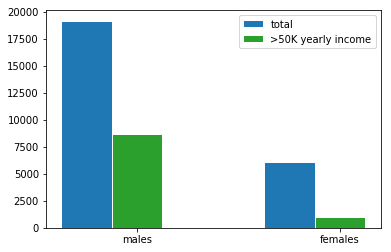

In [16]:
hewm = np.sum((adult['race'] == 'White') & (adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K'))
hewf = np.sum((adult['race'] == 'White') & (adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K'))

bars1 = [combined_list[0][1], hewm]
bars2 = [combined_list[1][1], hewf]

x_labels = ['males', 'females']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='total')
plt.bar(r2, bars2, color='tab:green', width=barWidth, edgecolor='white', label='>50K yearly income')

plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()

#### income for non-white males and females

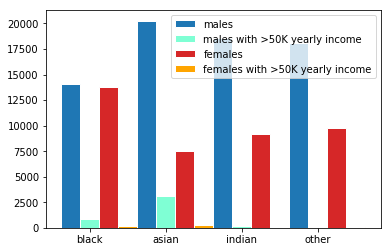

In [17]:
# calculate sum of high earning indivduals for each gender and race
highly_paid_males = []
highly_paid_females = []
for r in pd.unique(adult['race']) :
    if r != 'White':
        highly_paid_males.append(np.sum((adult['race'] == r) 
                                      & (adult['sex'] == 'Male') & (adult['income-per-year'] == '>50K')))
        highly_paid_females.append(np.sum((adult['race'] == r) 
                                      & (adult['sex'] == 'Female') & (adult['income-per-year'] == '>50K')))

bars1 = [x[1] for x in combined_list[2::2]]
bars2 = highly_paid_males
bars3 = [x[1] for x in combined_list[3::2]]
bars4 = highly_paid_females

x_labels = ['black', 'asian', 'indian', 'other']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.bar(r1, bars1, color='tab:blue', width=barWidth, edgecolor='white', label='males')
plt.bar(r2, bars2, color='aquamarine', width=barWidth, edgecolor='white', label='males with >50K yearly income')
plt.bar(r3, bars3, color='tab:red', width=barWidth, edgecolor='white', label='females')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='females with >50K yearly income')


plt.xticks([r + barWidth for r in range(len(bars1))], x_labels)
plt.legend()
plt.show()